# **VISUALISASI WORD CLOUD**
# Dzaky Raihan Ahmad
# 1301204316

In [33]:
import warnings
warnings.filterwarnings("ignore")

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt


In [34]:
# Load in the dataframe
df = pd.read_csv("mahfud.csv", delimiter=';')

In [35]:
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Thu Nov 16 23:59:33 +0000 2023,1725302620594766160,"Pak Ganjar bukan hanya bicara politik, tapi ju...",0,0,0,0,in,1684849330157711360,1725302620594766160,mamaatrasyid,https://twitter.com/mamaatrasyid/status/172530...
1,Thu Nov 16 23:59:21 +0000 2023,1725302568941989912,@psi_id Yang mau jadi presiden tu gibran apa p...,0,25,29,117,in,1464448807429623817,1725021995786801220,PreciosaKanti,https://twitter.com/PreciosaKanti/status/17253...
2,Thu Nov 16 23:59:12 +0000 2023,1725302529293254850,salah pasangan ih pak mahfud,0,0,0,0,in,2552852490,1725302529293254850,NatasyaBillman,https://twitter.com/NatasyaBillman/status/1725...
3,Thu Nov 16 23:58:40 +0000 2023,1725302396551925832,@BosPurwa Mahfud harus pertanggung jawabkan pe...,0,0,0,0,in,793427822949769216,1725117947033923784,MgmPtmgm,https://twitter.com/MgmPtmgm/status/1725302396...
4,Thu Nov 16 23:57:12 +0000 2023,1725302028669497658,🥰🥰🥰 JOKOWI NKRI SEJATI ADALAH ANUGERAH ILLAHI ...,0,0,0,1,in,2893212176,1725302028669497658,DominBin,https://twitter.com/DominBin/status/1725302028...
...,...,...,...,...,...,...,...,...,...,...,...,...
2001,Thu Nov 16 14:26:10 +0000 2023,1725158320221065517,Konflik hanya menghancurkan impian kami @reinh...,0,0,0,0,in,1682224228714840069,1725158320221065517,KemalaPusp60,https://twitter.com/KemalaPusp60/status/172515...
2002,Thu Nov 16 14:26:05 +0000 2023,1725158302261092423,"Selamat pagi, Pak Ganjar! Kalo udah jadi presi...",0,0,0,0,in,1684026399001284608,1725158302261092423,ridhoferdiyans2,https://twitter.com/ridhoferdiyans2/status/172...
2003,Thu Nov 16 14:26:04 +0000 2023,1725158298658144419,"Ntar pas jalan pagi di Bali, pasti ada yang ma...",0,0,0,0,in,1696376266096820224,1725158298658144419,ApriantoLinto,https://twitter.com/ApriantoLinto/status/17251...
2004,Thu Nov 16 14:26:04 +0000 2023,1725158296338804990,"Pemimpin yang peduli pada lingkungan, Ganjar P...",0,0,0,0,in,1695058714082828288,1725158296338804990,rntoptraa,https://twitter.com/rntoptraa/status/172515829...


In [36]:
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))

print("There are {} username in this dataset such as {}... \n".format(len(df.username.unique()),
                                                                           ", ".join(df.username.unique()[0:5])))

print("There are {} tweets in this dataset such as {}... \n".format(len(df.full_text.unique()),
                                                                                      ", ".join(df.full_text.unique()[0:5])))

There are 2006 observations and 12 features in this dataset. 

There are 1454 username in this dataset such as mamaatrasyid, PreciosaKanti, NatasyaBillman, MgmPtmgm, DominBin... 

There are 1986 tweets in this dataset such as Pak Ganjar bukan hanya bicara politik, tapi juga bertindak nyata untuk menciptakan perubahan positif Sebuah teladan bagi pemimpin masa depan @tinyken_  Ganjar Mahfud M3nang https://t.co/5YtrJT72dK, @psi_id Yang mau jadi presiden tu gibran apa prabowo sih???   Jujur membangongkang.  Kenapa ngak prestasi prabowo yg di angkat sih?   Butuh pengakuan banget apa gibrannya?   Makanya pilih yg jelas2 aja. Jelas prestasi, rekam jejak &amp  pengalaman. GANJAR MAHFUD 🤟, salah pasangan ih pak mahfud, @BosPurwa Mahfud harus pertanggung jawabkan pernyataannya jelas manipulatif dan pembodohan !, 🥰🥰🥰 JOKOWI NKRI SEJATI ADALAH ANUGERAH ILLAHI SANG PENYELAMAT NKRI.🥰🥰🥰 SEBAIKNYA JOKOWI WAJIB 3 PERIODE🥰🥰🥰 APA   BOLEH BUAT DEMI SELAMATNYA NKRI  2024 BIAR GANJAR-MAHFUD AJA MAKA SELAMAT

In [37]:
df[["full_text", "lang","username"]].head()

,full_text,lang,username
0,"Pak Ganjar bukan hanya bicara politik, tapi ju...",in,mamaatrasyid
1,@psi_id Yang mau jadi presiden tu gibran apa p...,in,PreciosaKanti
2,salah pasangan ih pak mahfud,in,NatasyaBillman
3,@BosPurwa Mahfud harus pertanggung jawabkan pe...,in,MgmPtmgm
4,🥰🥰🥰 JOKOWI NKRI SEJATI ADALAH ANUGERAH ILLAHI ...,in,DominBin


In [38]:
?WordCloud

@BosPurwa Mahfud harus pertanggung jawabkan pernyataannya jelas manipulatif dan pembodohan !


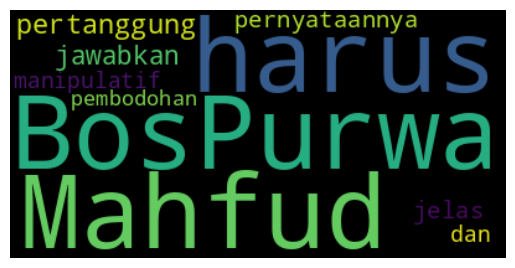

In [39]:
# Start with one review:
text = df.full_text[3]
print(text)

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# # Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

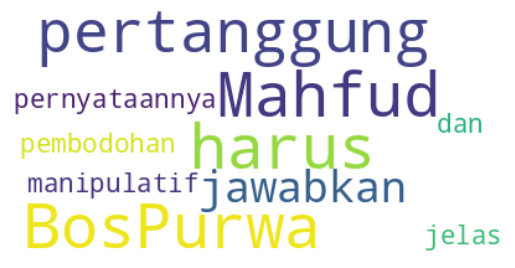

In [40]:
# lower max_font_size, change the maximum number of word and lighten the background:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

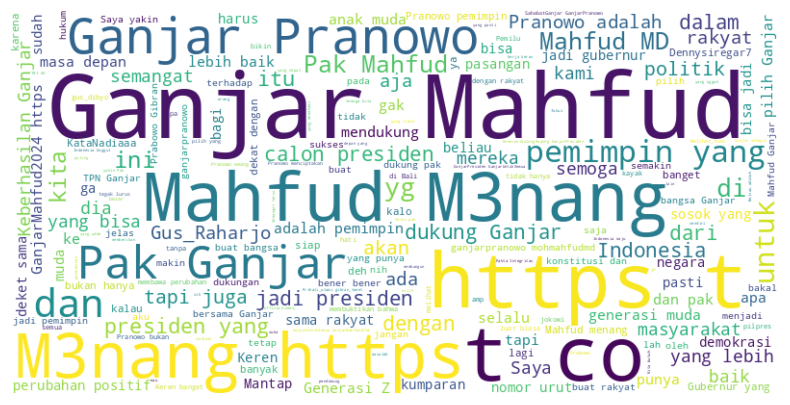

In [41]:
# Gabungkan semua teks menjadi satu string
text = ' '.join(df['full_text'])

# Membuat objek WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Menampilkan WordCloud menggunakan Matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


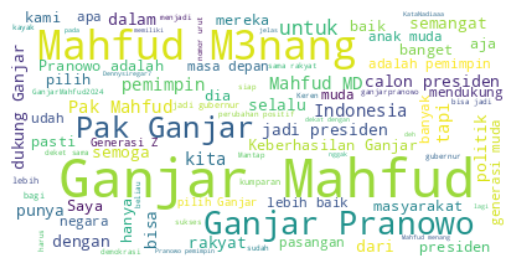

In [42]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "gibran_tweet","PrabowoGemoy","dan", "yg","t","co","ke","yang","di","ada","kalau","ini","itu","ya","juga","bukan","tidak","kalo","karena","ðŸ","akan", "Prihati_utami", "DokterTifa", "gak", "ga", "@", "Gus_Raharjo"])

# # Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# # Display the generated image:
# # the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
import re
import string

def remove_special_char(text):
    text = text.replace('\\t', " ").replace('\\n', " ").replace('\\u', " ").replace('\\', "")
    text = text.encode('ascii', 'replace').decode('ascii')
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)", " ", text).split())
    return text.replace("http://", " ").replace("https://", " ")

def delNum(text):
    return re.sub(r"\d+", "", text)

def delPunct(text):
    return text.translate(str.maketrans("", "", string.punctuation))

def delWlt(text):
    return text.strip()

def delWmt(text):
    return re.sub('\s+', ' ', text)

def delSingle_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)


def cleansing(text):
 text = remove_special_char(text)
 text = delNum(text)
 text = delPunct(text)
 text = delWlt(text)
 text = delWmt(text)
 text = delSingle_char(text)
 return text

In [44]:
df['full_text'] = df['full_text'].apply(lambda x: cleansing(x))
df

,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,Thu Nov 16 23:59:33 +0000 2023,1725302620594766160,Pak Ganjar bukan hanya bicara politik tapi jug...,0,0,0,0,in,1684849330157711360,1725302620594766160,mamaatrasyid,https://twitter.com/mamaatrasyid/status/172530...
1,Thu Nov 16 23:59:21 +0000 2023,1725302568941989912,id Yang mau jadi presiden tu gibran apa prabow...,0,25,29,117,in,1464448807429623817,1725021995786801220,PreciosaKanti,https://twitter.com/PreciosaKanti/status/17253...
2,Thu Nov 16 23:59:12 +0000 2023,1725302529293254850,salah pasangan ih pak mahfud,0,0,0,0,in,2552852490,1725302529293254850,NatasyaBillman,https://twitter.com/NatasyaBillman/status/1725...
3,Thu Nov 16 23:58:40 +0000 2023,1725302396551925832,Mahfud harus pertanggung jawabkan pernyataanny...,0,0,0,0,in,793427822949769216,1725117947033923784,MgmPtmgm,https://twitter.com/MgmPtmgm/status/1725302396...
4,Thu Nov 16 23:57:12 +0000 2023,1725302028669497658,JOKOWI NKRI SEJATI ADALAH ANUGERAH ILLAHI SANG...,0,0,0,1,in,2893212176,1725302028669497658,DominBin,https://twitter.com/DominBin/status/1725302028...
...,...,...,...,...,...,...,...,...,...,...,...,...
2001,Thu Nov 16 14:26:10 +0000 2023,1725158320221065517,Konflik hanya menghancurkan impian kami ulla G...,0,0,0,0,in,1682224228714840069,1725158320221065517,KemalaPusp60,https://twitter.com/KemalaPusp60/status/172515...
2002,Thu Nov 16 14:26:05 +0000 2023,1725158302261092423,Selamat pagi Pak Ganjar Kalo udah jadi preside...,0,0,0,0,in,1684026399001284608,1725158302261092423,ridhoferdiyans2,https://twitter.com/ridhoferdiyans2/status/172...
2003,Thu Nov 16 14:26:04 +0000 2023,1725158298658144419,Ntar pas jalan pagi di Bali pasti ada yang man...,0,0,0,0,in,1696376266096820224,1725158298658144419,ApriantoLinto,https://twitter.com/ApriantoLinto/status/17251...
2004,Thu Nov 16 14:26:04 +0000 2023,1725158296338804990,Pemimpin yang peduli pada lingkungan Ganjar Pr...,0,0,0,0,in,1695058714082828288,1725158296338804990,rntoptraa,https://twitter.com/rntoptraa/status/172515829...


In [45]:
gambar_mask = np.array(Image.open("mahfud.jpg"))
gambar_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [46]:
gambar_mask.shape

(804, 1149, 3)

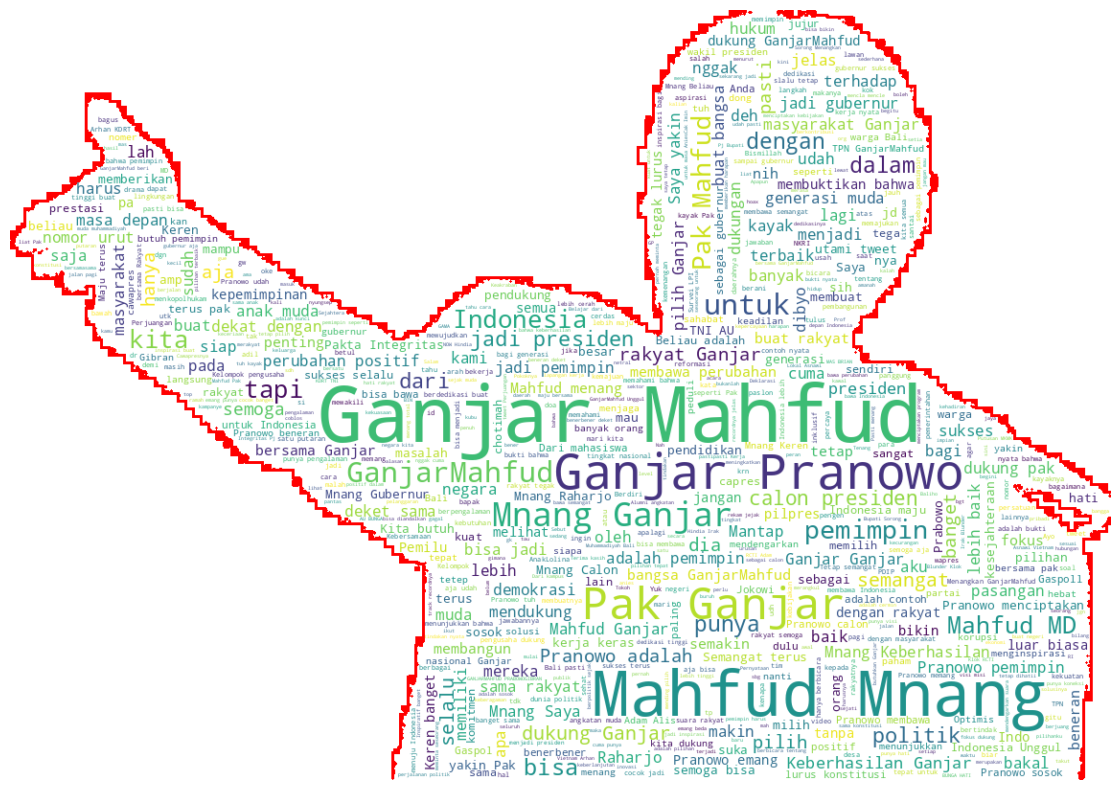

In [47]:
text = ' '.join(df['full_text'])
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=10000, mask=gambar_mask, stopwords=stopwords, contour_width=4, contour_color='red')

# Generate a wordcloud
wc.generate(text)
wc.to_file("mahfudword.jpg")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

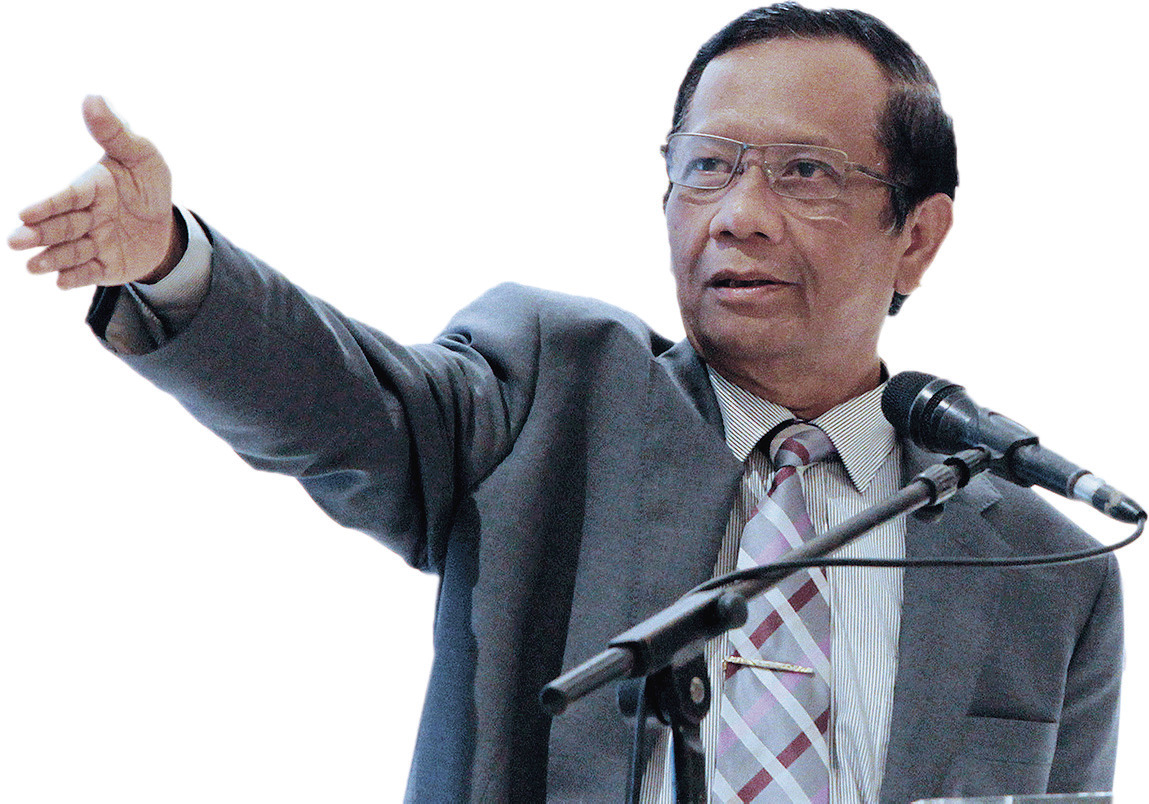

In [51]:
gambar_mask = np.array(Image.open("vote.png"))
gambar_mask

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [52]:
gambar_mask.shape

(841, 880, 3)

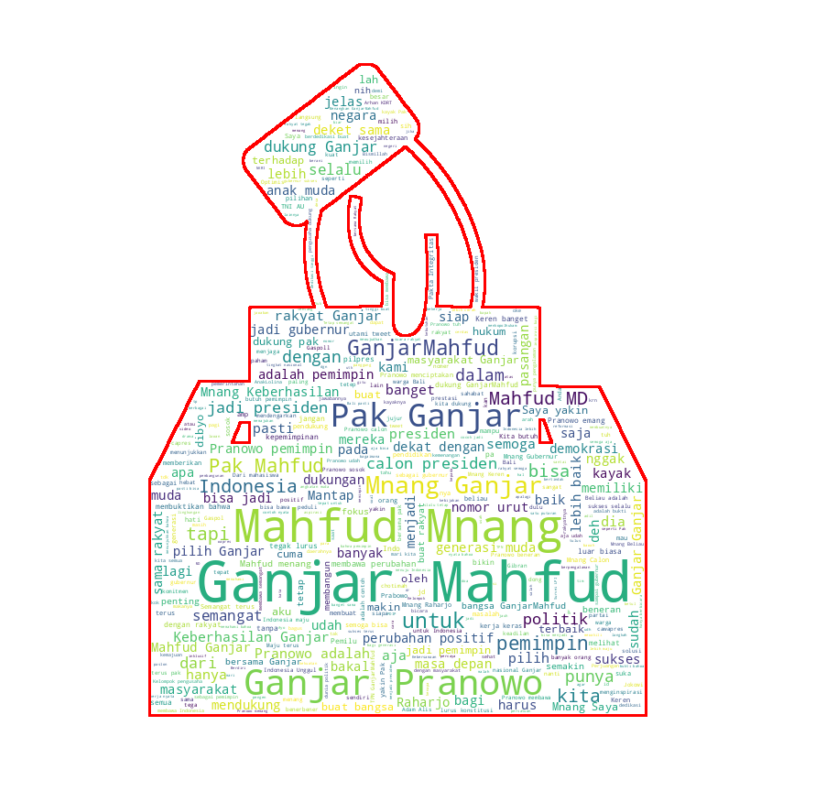

In [53]:
text = ' '.join(df['full_text'])
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=10000, mask=gambar_mask, stopwords=stopwords, contour_width=4, contour_color='red')

# Generate a wordcloud
wc.generate(text)
wc.to_file("mahfudword2.jpg")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

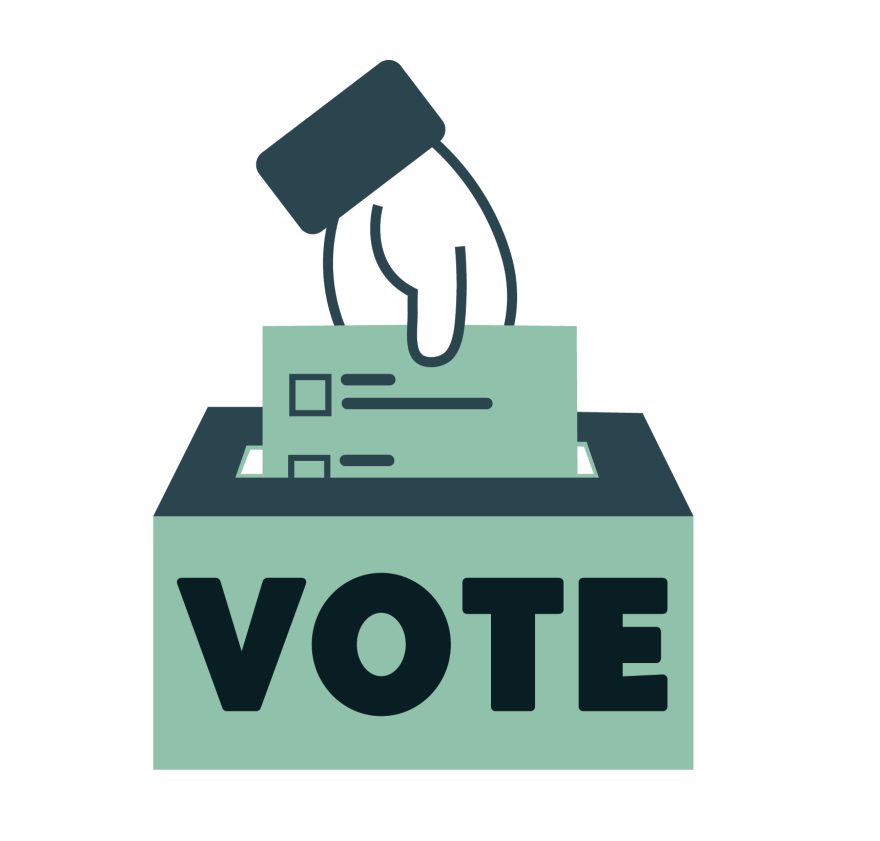